In [1]:
import pickle
import matplotlib.pyplot as plt
from solver import information
import math
from solver.wordle_color import WordleColor
import fastenum
from solver import wordle_color
import sklearn
from sklearn.datasets import make_classification
import pandas as pd 
import numpy as np

In [2]:
info_path = 'information_all_words_hidden_words.pkl'
pattern_freq_path = 'pattern_frequencies_all_words_hidden_words.pkl'
guesses_path = 'info_theory_guesses.pkl'

with open(guesses_path, 'rb') as handle:
    guesses = pickle.load(handle)

In [3]:
hidden_words_path = 'solver/hidden_words.txt'
with open(hidden_words_path, 'r', encoding='UTF-8') as file:
    hidden_words_vocab = [w.strip() for w in file.readlines()]
all_words_path = 'solver/official_words.txt'
with open(all_words_path, 'r', encoding='UTF-8') as file:
    vocab = [w.strip() for w in file.readlines()]

In [4]:
pattern_frequencies = information.compute_pattern_frequencies(vocab, hidden_words_vocab)

In [5]:
info = information.compute_information_from_frequencies(pattern_frequencies, hidden_words_vocab)

In [6]:
avg_guess_count = sum([len(val) for val in guesses.values()]) / len(guesses.values())
print(f'Average number of guesses before solve: {avg_guess_count}')

Average number of guesses before solve: 3.608921611087051


In [7]:
worst_case = max([len(val) for val in guesses.values()])
print(f'Worst case solve: {worst_case} guesses')

Worst case solve: 6 guesses


In [17]:
best_word = max(info.items(), key=lambda x: x[1])
worst_word = sorted(info.items(), key=lambda x: x[1])[1] # Actual worst word is 'xviii' which is not a word

In [37]:
ddd = sorted(info.items(), key=lambda x: -x[1])[0:5] # Actual worst word is 'xviii' which is not a word

In [39]:
dict(ddd)

{'tarse': 5.94897450995552,
 'tiare': 5.9299542223135076,
 'soare': 5.885202744292758,
 'roate': 5.8848563137320085,
 'raise': 5.87830295649317}

In [9]:
# Best and worst words
print(f'Best word with information value: {best_word}')
print(f'Worst word with information value: {worst_word}')

Best word with information value: ('tarse', 5.94897450995552)
Worst word with information value: ('qajaq', 1.890192906058706)


In [40]:
sorted(info.items(), key=lambda x: -x[1])[0:100]

[('tarse', 5.94897450995552),
 ('tiare', 5.9299542223135076),
 ('soare', 5.885202744292758),
 ('roate', 5.8848563137320085),
 ('raise', 5.87830295649317),
 ('reast', 5.8677380208435626),
 ('raile', 5.865153829041269),
 ('slate', 5.855819244109515),
 ('salet', 5.836022782092483),
 ('crate', 5.835215982633283),
 ('irate', 5.8327988809409055),
 ('trace', 5.8304291080797555),
 ('sater', 5.824433603243966),
 ('arise', 5.821023459282913),
 ('orate', 5.818944424934238),
 ('stare', 5.806888622249769),
 ('carte', 5.795107334913878),
 ('raine', 5.78619335579054),
 ('ranse', 5.778303349748772),
 ('caret', 5.778206935929553),
 ('ariel', 5.774556718543184),
 ('taler', 5.773100192090809),
 ('carle', 5.769364406731746),
 ('slane', 5.768957321758764),
 ('snare', 5.768678157325963),
 ('artel', 5.768573927081606),
 ('strae', 5.768384619808219),
 ('arose', 5.767804897087285),
 ('carse', 5.765433183401704),
 ('saine', 5.764656266167475),
 ('earst', 5.76015300887071),
 ('taser', 5.755618256159077),
 ('leas

In [11]:
def map_color_tuple_to_char(color_tuple):
    output = ''
    for color in color_tuple:
        if color == WordleColor.BLACK:
            output += 'B'
        if color == WordleColor.YELLOW:
            output += 'Y'
        if color == WordleColor.GREEN:
            output += 'G'
            
    return output

In [12]:
# all_word_count = len(pattern_frequencies)
hidden_word_count = 2309
worst_probabilities = [(map_color_tuple_to_char(pattern),len(word_set)/hidden_word_count,len(word_set)) for pattern, word_set in pattern_frequencies[worst_word[0]].items()]
best_probabilities = [(map_color_tuple_to_char(pattern),len(word_set)/hidden_word_count,len(word_set)) for pattern, word_set in pattern_frequencies[best_word[0]].items()]

In [13]:
worst_probabilities_sorted = sorted(worst_probabilities, key=lambda x: -x[1])
best_probabilities_sorted = sorted(best_probabilities, key=lambda x: -x[1])

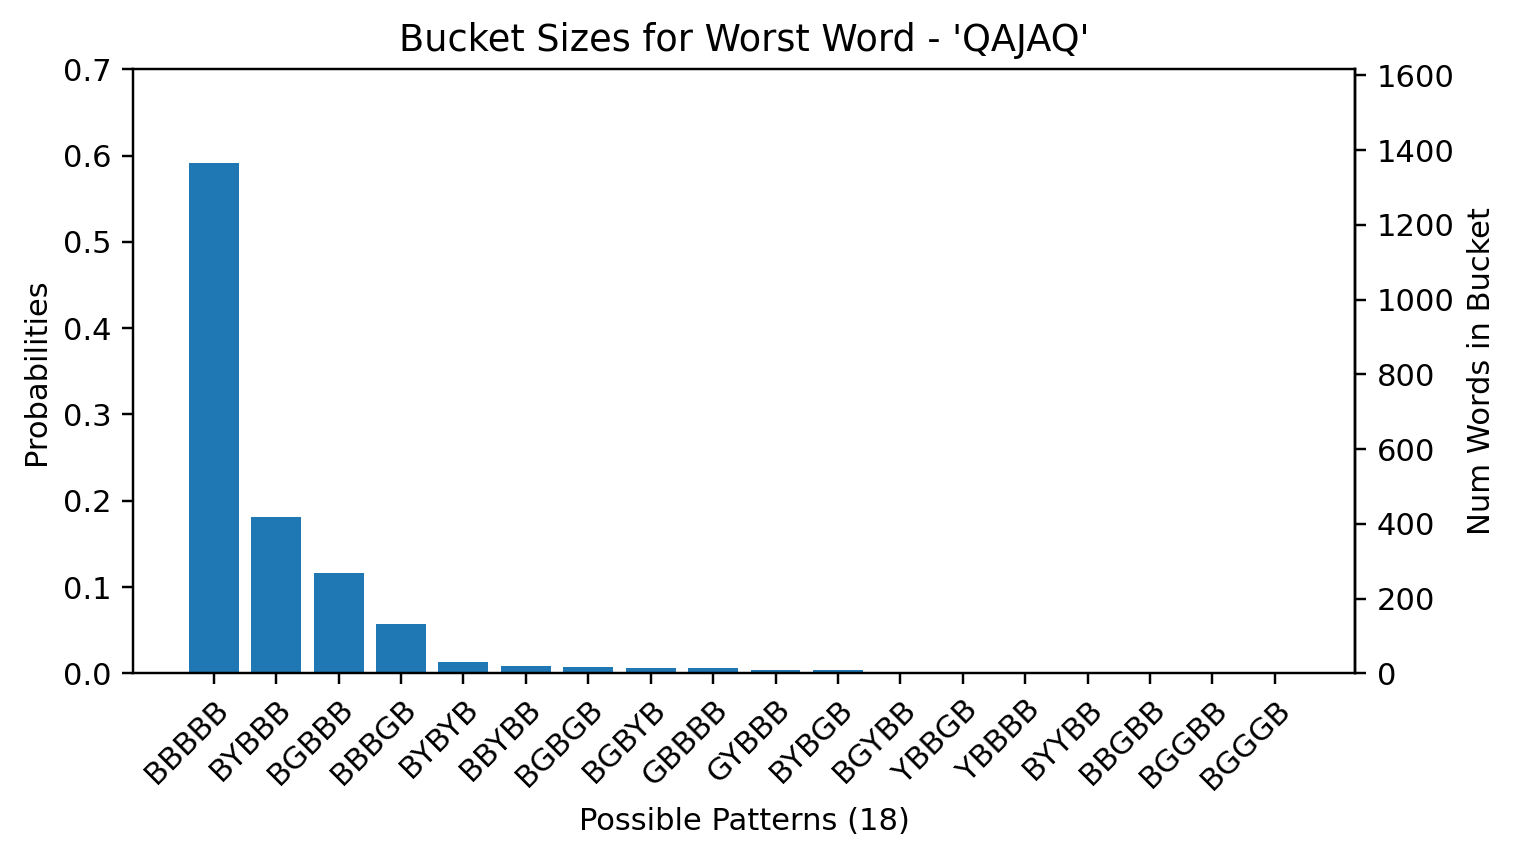

In [14]:
fig, ax = plt.subplots(figsize=(7,4),dpi=220)
ax.bar([str(b[0]) for b in worst_probabilities_sorted], [b[1] for b in worst_probabilities_sorted])
ax.set_ylim(0, 0.7)
ax.set_xlabel(f"Possible Patterns ({len(worst_probabilities_sorted)})")
ax.set_title("Bucket Sizes for Worst Word - 'QAJAQ'")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax2 = ax.secondary_yaxis('right', functions=(lambda x: 2309 * x,lambda x: x/2309))
ax.set_ylabel("Probabilities")
ax2.set_ylabel('Num Words in Bucket')
fig.tight_layout()
fig.savefig('qajaq_distributions.png')

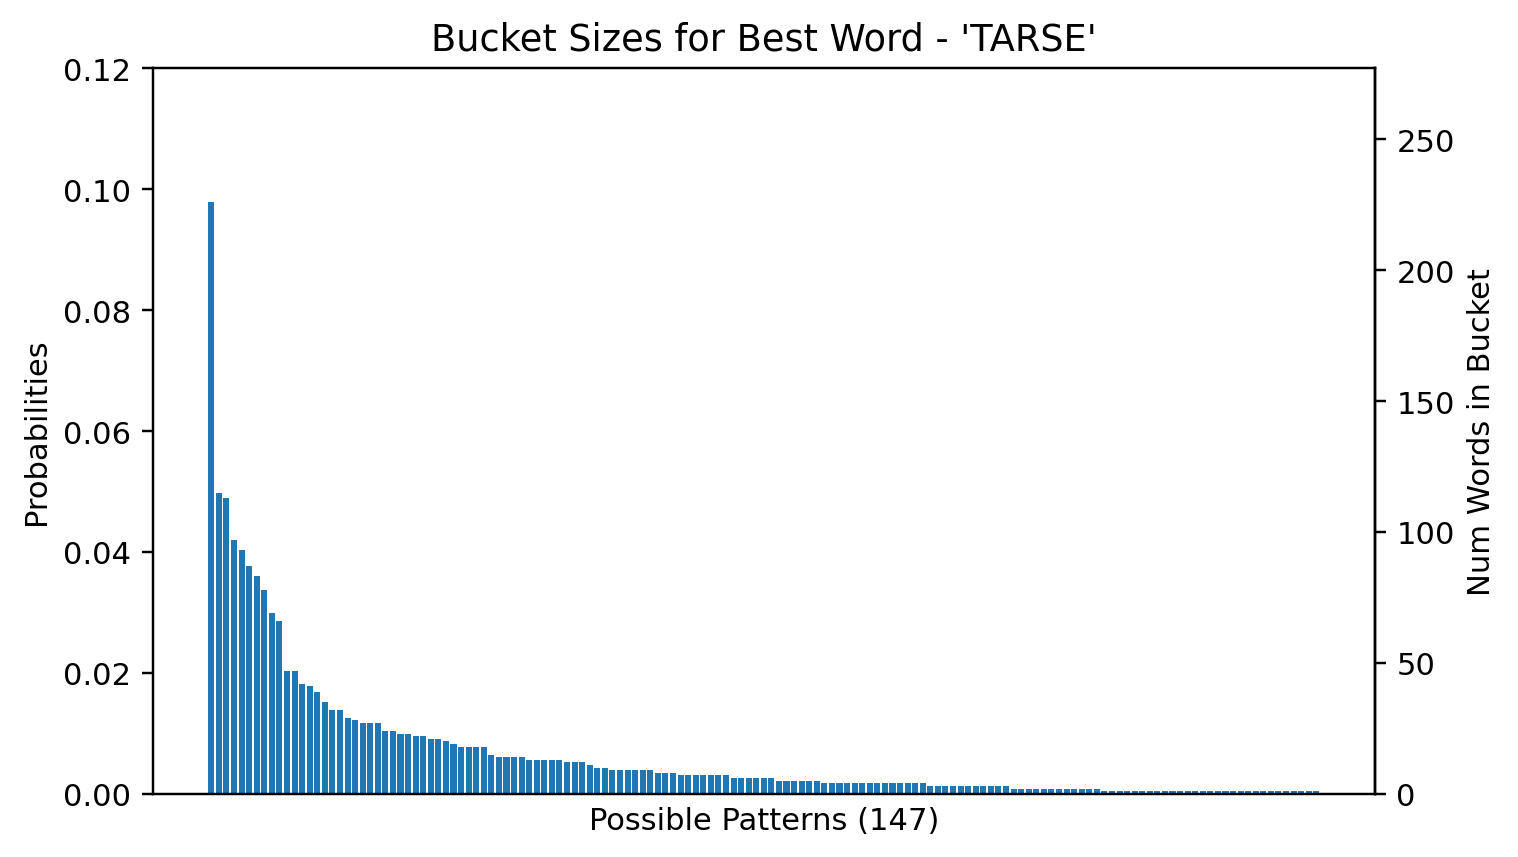

In [15]:
fig, ax = plt.subplots(figsize=(7,4), dpi=220)
ax.bar([str(b[0]) for b in best_probabilities_sorted], [b[1] for b in best_probabilities_sorted])
ax.set_ylim(0, 0.12)
ax.set_title("Bucket Sizes for Best Word - 'TARSE'")
ax.set_ylabel("Probabilities")
ax.set_xlabel(f"Possible Patterns ({len(best_probabilities_sorted)})")
ax2 = ax.secondary_yaxis('right', functions=(lambda x: 2309 * x,lambda x: x/2309))
ax.set_ylabel("Probabilities")
ax2.set_ylabel('Num Words in Bucket')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
fig.tight_layout()
fig.savefig('tarse_distributions.png')

In [245]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, class_sep=0.7, random_state=7
)
dataset = pd.DataFrame(np.concatenate([X, y.reshape(1,len(y)).T],axis=1), columns=['x1','x2', 'y'])

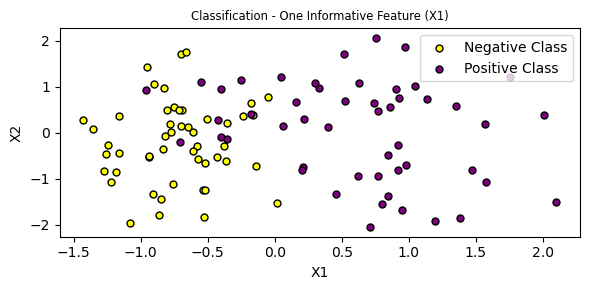

In [304]:
fig, ax = plt.subplots(figsize=(6,3))
ax.set_title("Classification - One Informative Feature (X1)", fontsize="small")
ax.scatter(dataset[dataset['y'] == 0]['x1'], dataset[dataset['y'] == 0]['x2'], marker="o", c='yellow', s=25, edgecolor="k", label='Negative Class')
ax.scatter(dataset[dataset['y'] == 1]['x1'], dataset[dataset['y'] == 1]['x2'], marker="o", c='purple', s=25, edgecolor="k", label='Positive Class')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
fig.tight_layout()
fig.savefig('toy_example.png')

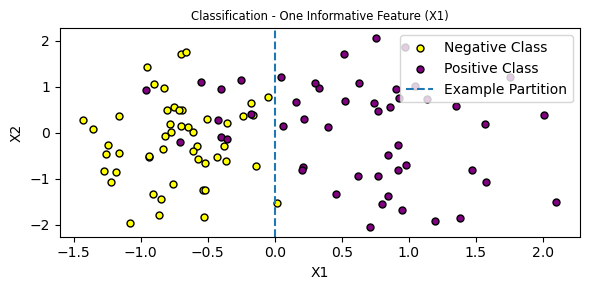

In [306]:
fig, ax = plt.subplots(figsize=(6,3))
ax.set_title("Classification - One Informative Feature (X1)", fontsize="small")
ax.scatter(dataset[dataset['y'] == 0]['x1'], dataset[dataset['y'] == 0]['x2'], marker="o", c='yellow', s=25, edgecolor="k", label='Negative Class')
ax.scatter(dataset[dataset['y'] == 1]['x1'], dataset[dataset['y'] == 1]['x2'], marker="o", c='purple', s=25, edgecolor="k", label='Positive Class')
ax.axvline(x=0.0, linestyle='--', label='Example Partition')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
fig.tight_layout()
fig.savefig('example_partition.png')

In [300]:
len(dataset[dataset['x1'] <= 0.0])

58

In [307]:
dataset[dataset['x1'] <= 0.0]['y'].sum()

9.0

In [302]:
len(dataset[dataset['x1'] > 0.0])

42

In [308]:
dataset[dataset['x1'] > 0.0]['y'].sum()

41.0

In [136]:
dataset

,x1,x2,y
0,0.841759,-0.478418,1.0
1,-0.529564,-1.832426,0.0
2,0.971101,1.860056,1.0
3,-0.424321,0.273439,1.0
4,0.218757,0.300680,1.0
...,...,...,...
95,-0.365959,-0.616922,0.0
96,0.927481,0.758725,1.0
97,-0.054112,0.781302,0.0
98,0.844090,-1.369860,1.0


In [187]:
def entropy(y):
    """
    Computes entropy for binary classification dataset
    """
    labels=[0,1]
    label_count = {}
    for label in labels:
        label_count[label] = 0
        for target in y:
            label_count[label] += 1 if target == label else 0

    information = 0
    for label, count in label_count.items():
        if count > 0:
            # Compute probability for each class and sum - -sum(p(class) * log2(p(class)))
            information += (math.log2(count / len(y)) * (count / len(y)))
    return -information

In [202]:
def compute_information_gain(dataset, feature_name, feature_val, target_name='y'):
    """
    Computes information gain on a feature for a given feature value.
    Higher values of information gain are desirable.
    """
    split1 = dataset[(dataset[feature_name] < feature_val)]
    split2 = dataset[(dataset[feature_name] >= feature_val)]
    weighted_split1 = (len(split1) / len(dataset)) * entropy(split1[target_name])
    weighted_split2 = (len(split2) / len(dataset)) * entropy(split2[target_name])
    weighted_entropy_children = weighted_split1 + weighted_split2
    entropy_parent = entropy(dataset[target_name])
    return entropy_parent - weighted_entropy_children

In [205]:
compute_information_gain (dataset, 'x1', -0.43)

0.4858265387806775

In [285]:
lower_bound = min(dataset['x1'])
upper_bound = max(dataset['x1'])

In [286]:
sorted_x1_points = sorted(dataset['x1'])

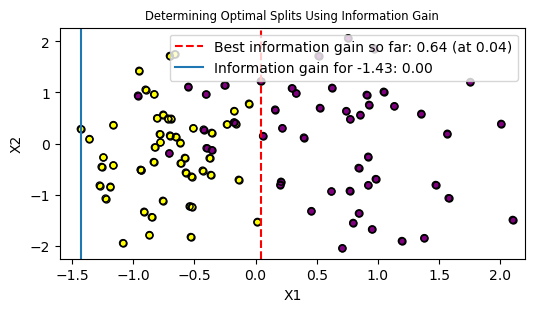

In [292]:
from matplotlib.animation import FuncAnimation
import random

fig, ax = plt.subplots(figsize=(6,3))

def animate(i, x=[], y=[]):
    global best_info_gain
    ax.cla()
    ax.set_title("Determining Optimal Splits Using Information Gain", fontsize="small")
    ax.scatter(dataset[dataset['y'] == 0]['x1'], dataset[dataset['y'] == 0]['x2'], marker="o", c='yellow', s=25, edgecolor="k")
    ax.scatter(dataset[dataset['y'] == 1]['x1'], dataset[dataset['y'] == 1]['x2'], marker="o", c='purple', s=25, edgecolor="k")
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xlim(-1.6, 2.2)
    gain = compute_information_gain(dataset, 'x1', i)
    if not best_info_gain or gain > best_info_gain[1]:
        best_info_gain = (i, gain)
        
    ax.axvline(x=best_info_gain[0], label=f'Best information gain so far: {round(best_info_gain[1], 2):.2f} (at {round(best_info_gain[0],2):.2f})', linestyle='--', color='red')
    ax.axvline(x=i, label=f'Information gain for {round(i,2):.2f}: {round(gain, 2):.2f}')
    ax.legend(loc='upper right')
    ax.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

best_info_gain = None
ani = FuncAnimation(fig, animate, frames=sorted_x1_points, interval=(1500.0/nframes))
# from IPython.display import HTML
# HTML(ani.to_jshtml())
ani.save('best_splits.mp4')